In [738]:
from typing import Tuple, Callable, List

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

### Task 2

1. Develop yourself using numpy library:
a) a function to implement gradient descent (GD) algorithm
b) Adam's optimization algorithm
for a function of two variables f(x,y).

In [739]:
def gradient_descent(init: List[float], func_to_optim: Callable, f_gradient: Callable, eps: float = 1e-8,
                     lr: float = 0.001):
    vector = np.array(init).copy()
    vector_old = np.array(vector).copy()
    iters = 0
    diffs = [np.abs(np.sum(vector - vector_old)) / len(vector)]
    points = [vector]
    while diffs[-1] > eps or iters == 0:
        vector_old = vector.copy()
        gradient = np.array(f_gradient(*vector))
        vector -= lr * gradient
        iters += 1
        diffs.append(np.abs(np.sum(vector - vector_old)) / len(vector))
        points.append(vector.copy())

    return vector, iters, diffs, points

In [740]:
def adam(init: List[float], func_to_optim: Callable, f_gradient: Callable, eps: float = 1e-8, lr: float = 0.001,
         beta1: float = 0.9, beta2: float = 0.9):
    vector = np.array(init).copy()
    vector_old = np.array(vector).copy()
    iters = 0
    diffs = [np.abs(np.sum(vector - vector_old)) / len(vector)]
    points = [vector]
    velocity = np.zeros(len(init))
    accumulated = np.zeros(len(init))
    while diffs[-1] > eps or iters == 0:
        vector_old = vector.copy()
        gradient = np.array(f_gradient(*vector))
        velocity = beta1 * velocity + (1 - beta1) * gradient
        accumulated = beta2 * accumulated + (1 - beta2) * gradient ** 2
        adaptive_lr = np.nan_to_num(lr / np.sqrt(accumulated))
        vector -= adaptive_lr * gradient
        iters += 1
        diffs.append(np.abs(np.sum(vector - vector_old)) / len(vector))
        points.append(vector.copy())

    return vector, iters, diffs, points

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [741]:
def f(x: float, y: float) -> float:
    return (1.5 - x + (x * y)) ** 2 + (2.25 - x + (x * (y ** 2))) ** 2 + (2.625 - x + (x * (y ** 3))) ** 2

/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_26255/662650717.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


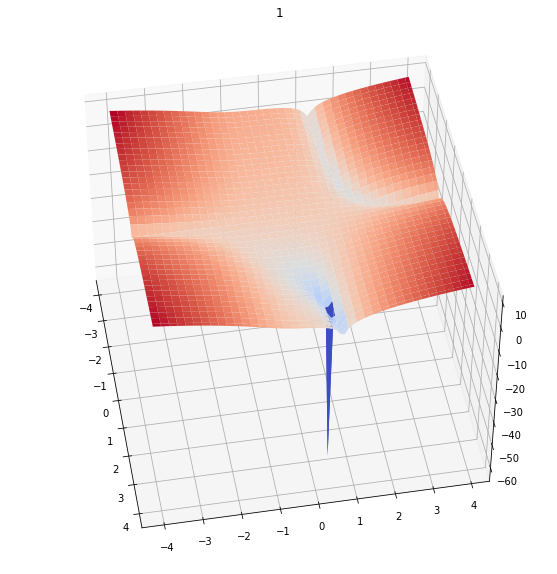

In [742]:
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')
ax.view_init(45, -10)

X = np.arange(-4, 4, 0.1)
Y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.log(f(X, Y))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_title("1")
plt.show()

In [743]:
def f_gradient(x: float, y: float, f: Callable, delta: float = 0.0001) -> Tuple[float, float]:
    dx = (f(x + delta, y) - f(x, y)) / delta
    dy = (f(x, y + delta) - f(x, y)) / delta
    return dx, dy

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [744]:
vector, iters, diffs, points = gradient_descent([1., 1.], f, lambda x, y: f_gradient(x, y, f), 1e-7, 0.001)
vector, iters

(array([2.99720473, 0.49925519]), 21438)

/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_26255/1537679242.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(len(diffs)), np.log(np.abs(diffs)))


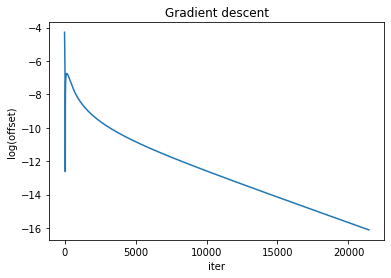

In [745]:
plt.plot(range(len(diffs)), np.log(np.abs(diffs)))
plt.title("Gradient descent")
plt.xlabel("iter")
plt.ylabel("log(offset)")
plt.show()

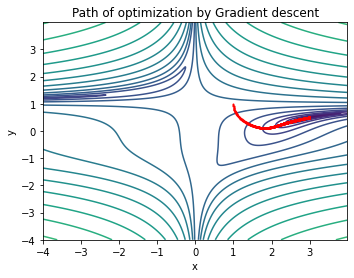

In [746]:
X = np.arange(-4, 4, 0.01)
Y = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.log(f(X, Y))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(-5, 20))
plt.plot([p[0] for p in points], [p[1] for p in points], "ro", markersize=1)
plt.title("Path of optimization by Gradient descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [747]:
vector, iters, diffs, points = adam([1., 1.], f, lambda x, y: f_gradient(x, y, f), eps=1e-8, lr=0.001)
vector, iters

/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_26255/2007852045.py:15: RuntimeWarning: divide by zero encountered in true_divide
  adaptive_lr = np.nan_to_num(lr / np.sqrt(accumulated))


(array([2.99820176, 0.498879  ]), 2326)

/var/folders/39/sbhbfb514339n_2mzhldqjm40000gn/T/ipykernel_26255/2139271896.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(len(diffs)), np.log(np.abs(diffs)))


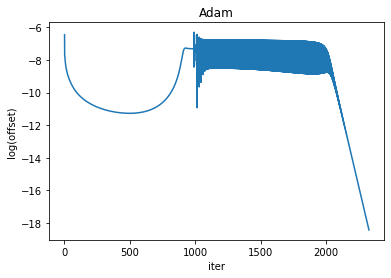

In [748]:
plt.plot(range(len(diffs)), np.log(np.abs(diffs)))
plt.title("Adam")
plt.xlabel("iter")
plt.ylabel("log(offset)")
plt.show()

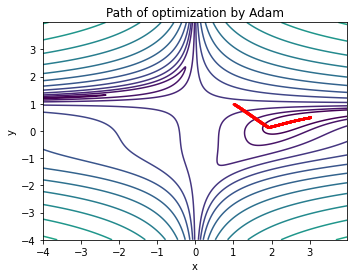

In [749]:
X = np.arange(-4, 4, 0.01)
Y = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.log(f(X, Y))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(20))
plt.plot([p[0] for p in points], [p[1] for p in points], "ro", markersize=1)
plt.title("Path of optimization by Adam")
plt.xlabel("x")
plt.ylabel("y")
plt.show()